<a href="https://colab.research.google.com/github/Navjotkarkhal/TR-102-/blob/main/Day_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today i try myself cleaning titanic dataset from kaggle using various python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
remove_duplicates = df.drop_duplicates()
remove_duplicates.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
missing_value_per = df.isnull().sum()/df.shape[0]*100
missing_value_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
missing_value_per_gre_20 = missing_value_per[missing_value_per >20].keys()
missing_value_per_gre_20

Index(['Cabin'], dtype='object')

In [9]:
df2_drop_clm = df.drop(columns = missing_value_per_gre_20)
df2_drop_clm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
df3_num = df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<Axes: >

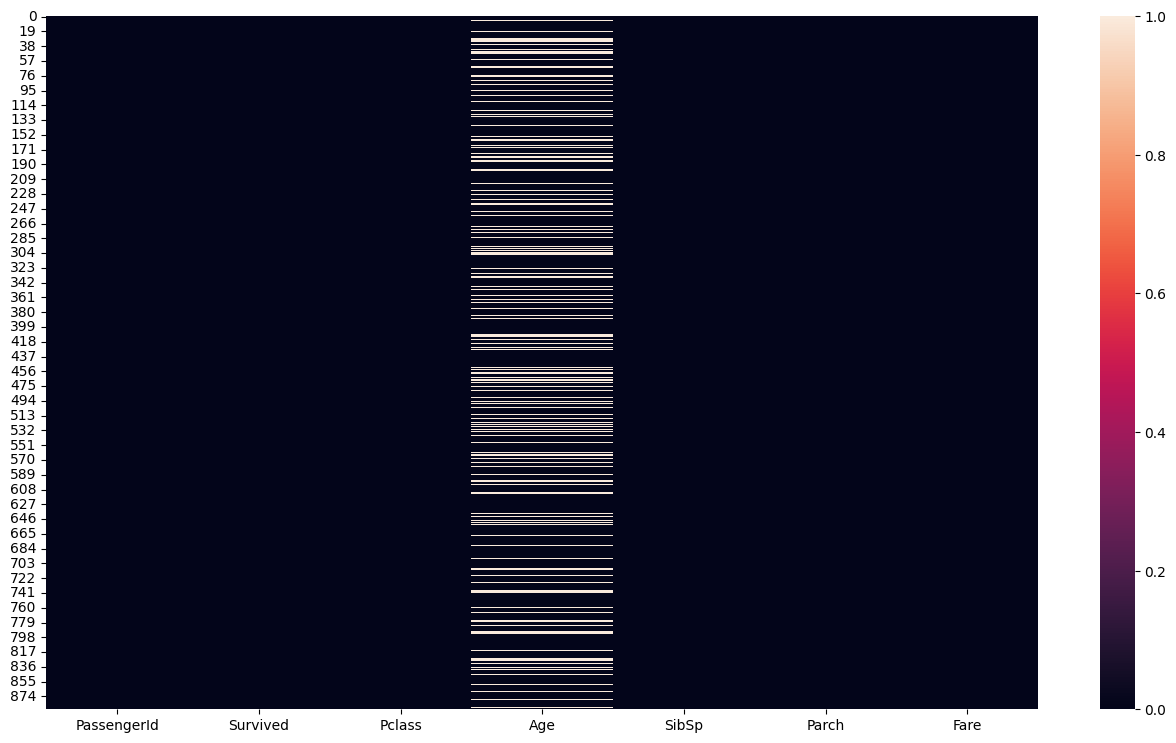

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df3_num.isnull())

In [12]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['Age']

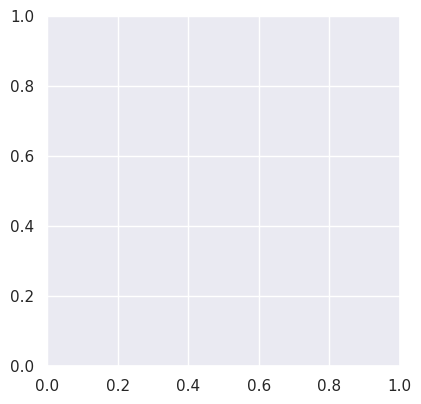

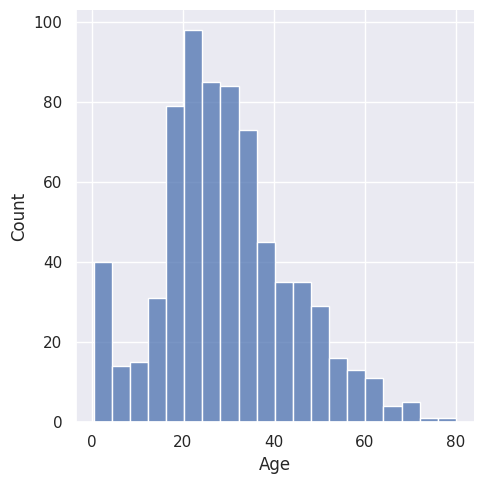

In [13]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.displot(df3_num[var],bins = 20, kde_kws={'linwidth':5,'color':'#DC143C'})

In [14]:
df4_num_median = df3_num.fillna(df3_num.median())
df4_num_median.isnull().sum().sum()

0

In [15]:
df_concat = pd.concat([df3_num[missing_num_var],df4_num_median[missing_num_var]])
df_concat[df_concat.isnull().any(axis=1)]

,Age
5,NaN
17,NaN
19,NaN
26,NaN
28,NaN
...,...
859,NaN
863,NaN
868,NaN
878,NaN


<Axes: >

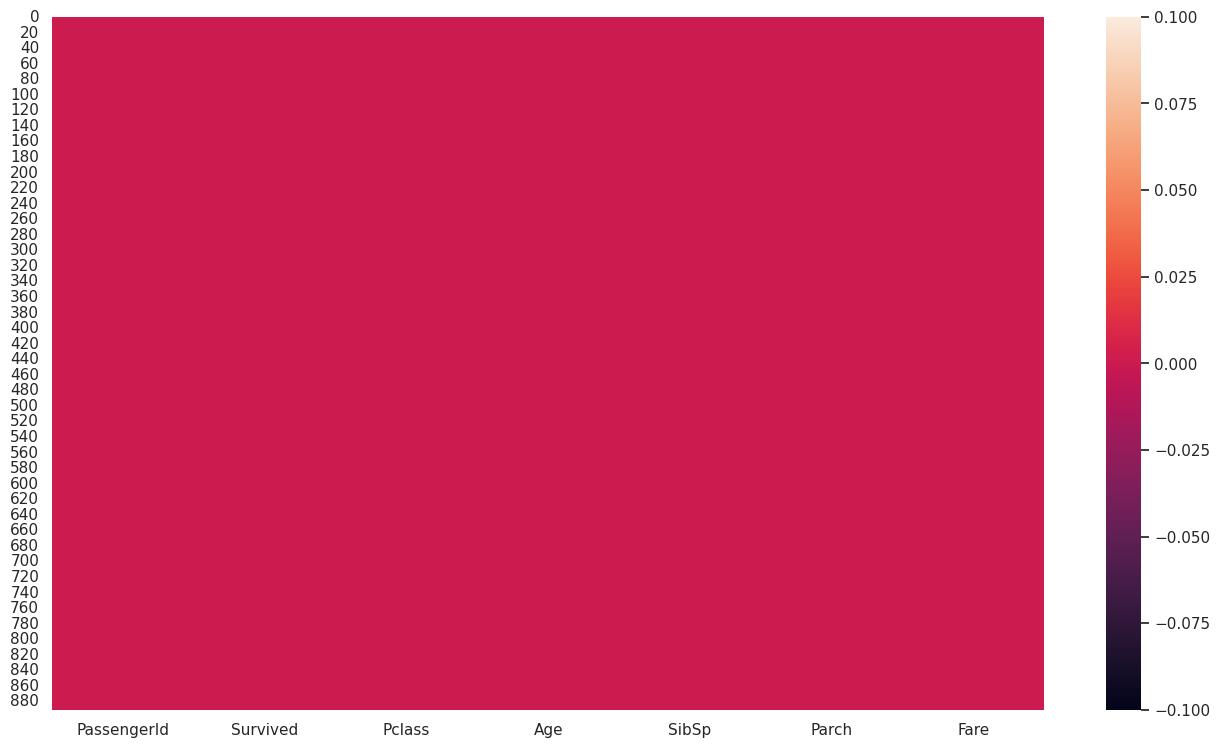

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df4_num_median.isnull())